# **ITCS 6112: Software System Design and Implementation**

<h1>Term Project</h1>


Group #1: Ara Chung, Desmond Williams, Abdullah Azihan, Chia Omotosho <br>
Project title: Coattails

Produce software that can predict market trends based on portfolios. We would like to create software that can collect public portfolios, like senators’ portfolios, and recommend stocks that are predicted to do well. The prediction of trends will be for a time period that is to be determined.

The front-end: https://bubble.io/page?name=index&id=coattails&tab=tabs-1

In [28]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas as pd
import os
import numpy as np
from datetime import datetime
from google.colab import drive
drive.mount("/content/drive")

In [60]:
try:
  congress_trans = pd.read_csv("all_transactions.csv")
except:
  congress_trans = pd.read_csv("/content/drive/MyDrive/all_transactions.csv")
#https://housestockwatcher.com/api
#https://senatestockwatcher.com/api

In [ ]:
congress_trans.columns

In [ ]:
congress_trans

In [33]:
congresscopy = congress_trans

In [ ]:
for i in range(len(congresscopy['transaction_date'])):
    try:  
        congresscopy['transaction_date'][i] = datetime.strptime(congresscopy['transaction_date'][i],'%Y-%m-%d')
        congresscopy['transaction_date'][i] = datetime.date(congresscopy['transaction_date'][i])
    except ValueError:
        congresscopy['transaction_date'][i] = np.datetime64('2022-01-01')

In [35]:
begin_2021 = np.datetime64('2021-01-01')
end_2021 = np.datetime64('2021-12-31')
mask = (congresscopy['transaction_date'] > begin_2021) & (congresscopy['transaction_date'] <= end_2021)
trans_2021 = congresscopy.loc[mask]

In [36]:
stonks = list((trans_2021['ticker'].unique()))

In [49]:
bunches = []
for items in stonks:
  bunches.append(yf.Ticker(items))

In [50]:
i = 5
buy_ratings2 = []

for rating in bunches:
    if i > 0:
      buy_ratings2.append(rating.recommendations)
    i = i - 1

In [51]:

for items in buy_ratings2:
    items.reset_index(inplace=True)
    items['Date'] = items['Date'].dt.strftime('%Y-%m-%d')


In [53]:
def get_2021(recommendation_info):
    recommendation_info_new = recommendation_info[recommendation_info['Date'].str.contains("2021")]
    recommendation_info_new = recommendation_info_new.loc[recommendation_info_new['To Grade'] == 'Buy']
    return recommendation_info_new

In [54]:
#VERY IMPORTANT!!
  #If this cell does not run, run the cell beneath this one and then run this one again.
  #There is a strange discrepancy in the way the data loads sometimes!!
buy_list = []
for items in buy_ratings2:
    buy_list.append(get_2021(items))
    

In [55]:
y = lambda a: datetime.date(datetime.strptime(a,'%Y-%m-%d')).month

In [56]:
i = 0
for companies in buy_list:
    for element in companies['Date']:
        for j in range(5202):
          try:
            if (trans_2021['transaction_date'][j].month in range(y(element)-1,y(element)+1)) & (trans_2021['ticker'][j] == stonks[i] ):
                print('In %d, %s was a good buy' %(trans_2021['transaction_date'][j].month,stonks[i]))
          except:
            pass
    i = i + 1


In 1, BP was a good buy
In 9, BP was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy
In 6, BLK was a good buy


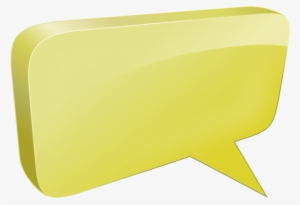

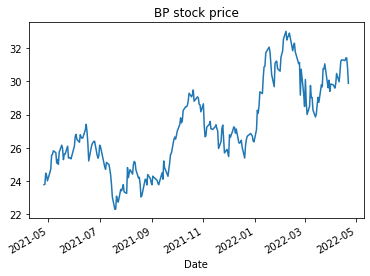

In [57]:
ticker = yf.Ticker("BP");
bp_df = ticker.history(period = "1y")
bp_df['Close'].plot(title = "BP stock price")